In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset.

data = pd.read_csv("smokers_health_data.csv")

In [3]:
# Show summary statistics about the dataset.

summary_stats = data.describe()
print(summary_stats)

               age   heart_rate  cigs_per_day         chol
count  3900.000000  3900.000000   3886.000000  3893.000000
mean     49.537949    75.688974      9.168554   236.595941
std       8.559275    12.015376     12.037999    44.375365
min      32.000000    44.000000      0.000000   113.000000
25%      42.000000    68.000000      0.000000   206.000000
50%      49.000000    75.000000      0.000000   234.000000
75%      56.000000    82.000000     20.000000   263.000000
max      70.000000   143.000000     70.000000   696.000000


In [4]:
# Info about dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


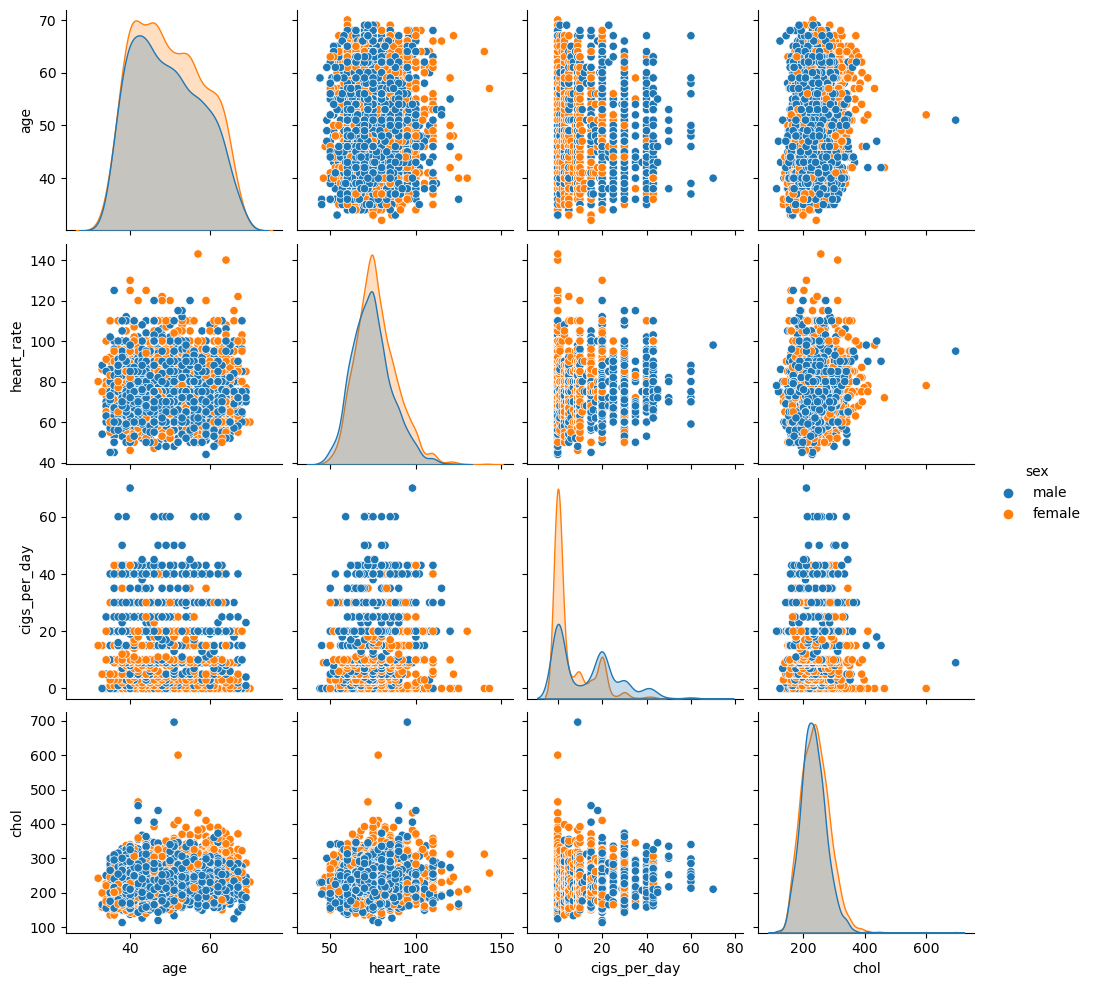

In [5]:
# Visualization dataset

sns.pairplot(data, hue='sex')
plt.show()

In [6]:
# Fill in missing data.

data.fillna(method="ffill", inplace=True)

In [7]:
# Eliminate outliers in 'cigs_per_day'.

Q1 = data["cigs_per_day"].quantile(0.25)
Q3 = data["cigs_per_day"].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data["cigs_per_day"] < (Q1 - 1.5 * IQR)) | (data["cigs_per_day"] > (Q3 + 1.5 * IQR)))]

In [8]:
# Converting data types.

data["cigs_per_day"] = pd.to_numeric(data["cigs_per_day"], errors="coerce")

In [9]:
# Calculating the mean value of 'cigs_per_day' variable.

mean_cigs = data["cigs_per_day"].mean()

In [10]:
# Fill NaN values in 'cigs_per_day'.

data["cigs_per_day"].fillna(mean_cigs, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3888 entries, 0 to 3887
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3888 non-null   int64  
 1   sex             3888 non-null   object 
 2   current_smoker  3888 non-null   object 
 3   heart_rate      3888 non-null   int64  
 4   blood_pressure  3888 non-null   object 
 5   cigs_per_day    3888 non-null   float64
 6   chol            3888 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 243.0+ KB
